## CMPINF 2100 WEEK 08
### Realistic KMeans clustering example - using Penguins
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Preprocess

We know that we need to standardize to REMOVE the mag and scale dominated by 1 variable.

In [4]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


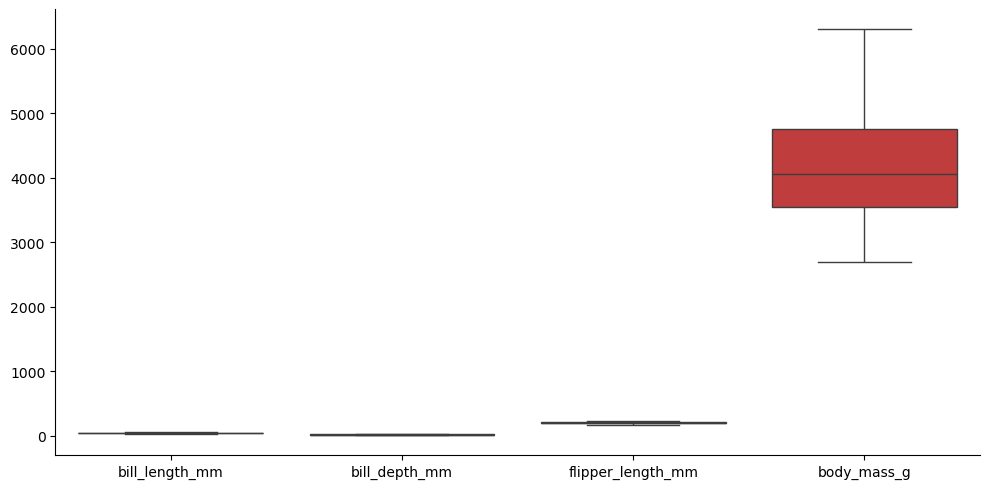

In [5]:
sns.catplot(data=penguins, kind="box", aspect=2)

plt.show()

Lets extract the num cols!

In [6]:
pens_features = penguins.select_dtypes("number")

Standardize using the StandardScaler method.

In [7]:
from sklearn.preprocessing import StandardScaler

INITIALIZE, FIT, and TRANSFORM in 1 line of code!!

In [8]:
Xpens = StandardScaler().fit_transform(pens_features)

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


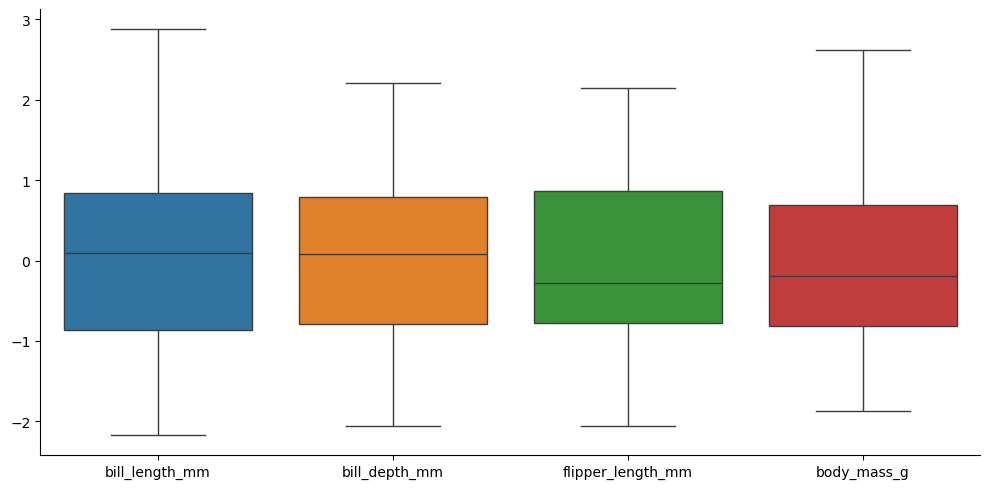

In [9]:
sns.catplot(data=pd.DataFrame(Xpens, columns=pens_features.columns), kind="box", aspect=2)

plt.show()

## KMeans

Now we know that there are 3 species in the penguins dataset.

In [10]:
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

However, lets follow GOOD practice and start out by applying KMeans with 2 clusters!!!

In [11]:
from sklearn.cluster import KMeans

INITIALIZE, FIT, and PREDICT in 1 line of code!

In [12]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict(Xpens)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

The reason why it is ALWAYS critical to FOLLOW the basic steps for EDA is we NEED TO always REMEMBER if our data set has MISSINGs.

In [13]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [14]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [15]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


The StandardScaler method **DROPS MISSINGS** behind the scenes!!

The KMeans method **CANNOT HANDLE** missings!!

BUT the SIMPLEST and MOST BASIC action for dealing with MISSINGS is to REMOVE THEM!!

REMOVING ANY ROW WITH AT LEAST 1 MISSING will return the COMPLETE CASES!!!

In [16]:
penguins_clean = penguins.dropna().copy()

In [17]:
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [18]:
penguins_clean.shape

(333, 7)

In [19]:
penguins_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

We MUST now PREPROCESS the CLEANED DataFrame and repeat the steps!!!

In [20]:
pens_features_clean = penguins_clean.select_dtypes("number").copy()

In [21]:
pens_features_clean

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


STANDARDIZE the cleaned numeric columns!!

In [22]:
X = StandardScaler().fit_transform(pens_features_clean)

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


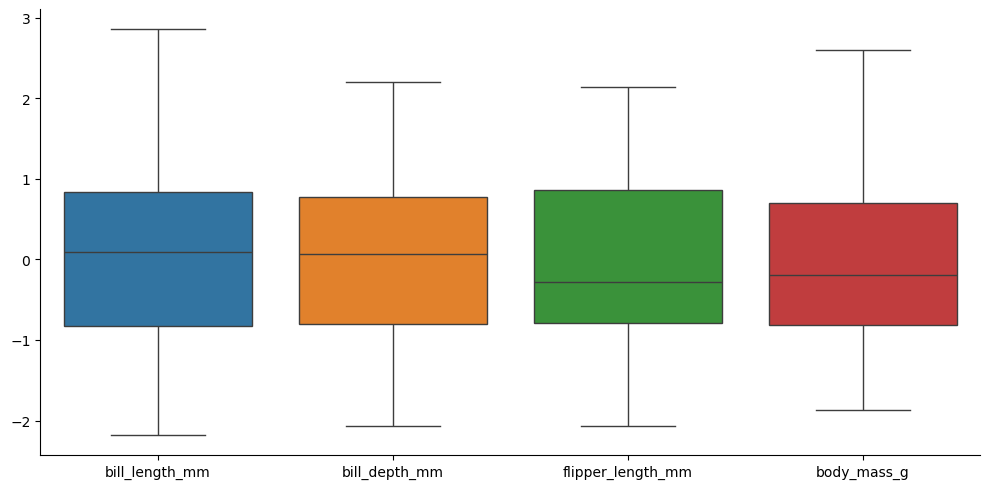

In [23]:
sns.catplot(data=pd.DataFrame(X, columns=pens_features_clean.columns), kind="box", aspect=2)

plt.show()

Now we can execute KMeans clustering!!

In [24]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict(X)

Assign the cluster labels to columns in a COPY of the cleaned data!

In [25]:
penguins_clean_copy = penguins_clean.copy()

In [26]:
penguins_clean_copy["k2"] = pd.Series(clusters_2, index=penguins_clean_copy.index).astype("category")

In [27]:
penguins_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    object  
 1   island             333 non-null    object  
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    object  
 7   k2                 333 non-null    category
dtypes: category(1), float64(4), object(3)
memory usage: 21.2+ KB


In [28]:
penguins_clean_copy.k2.value_counts()

k2
0    214
1    119
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


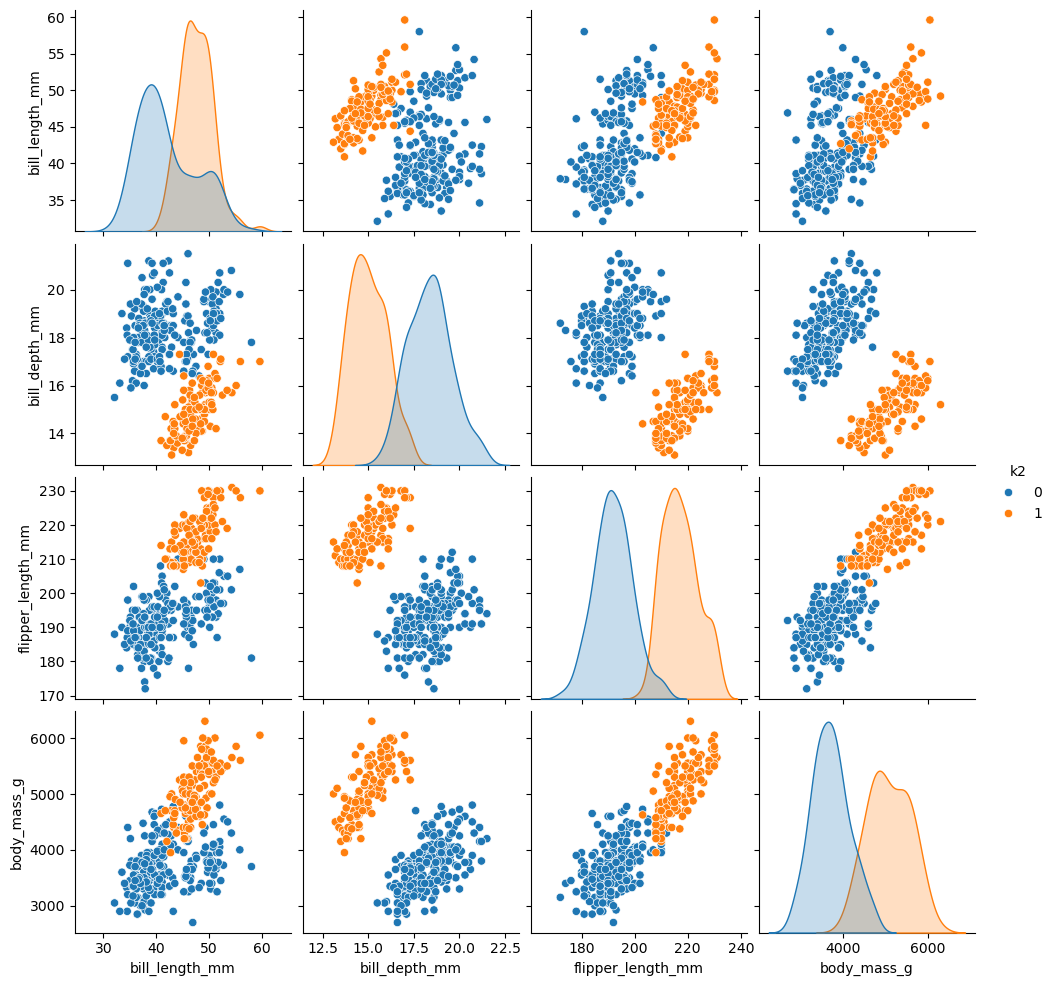

In [29]:
sns.pairplot(data=penguins_clean_copy, 
             hue="k2", 
             diag_kws={"common_norm":False})

plt.show()

## 3 Clusters

Since we know there are 3 species, lets create 3 clusters and then compare the clusters with the KNOWN groupings!!!

In [38]:
clusters_3 = KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500).fit_predict(X)

In [37]:
clusters_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
penguins_clean_copy["k3"] = pd.Series(clusters_3, index=penguins_clean_copy.index).astype("category")

In [32]:
penguins_clean_copy.k3.value_counts()

k3
1    129
0    119
2     85
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


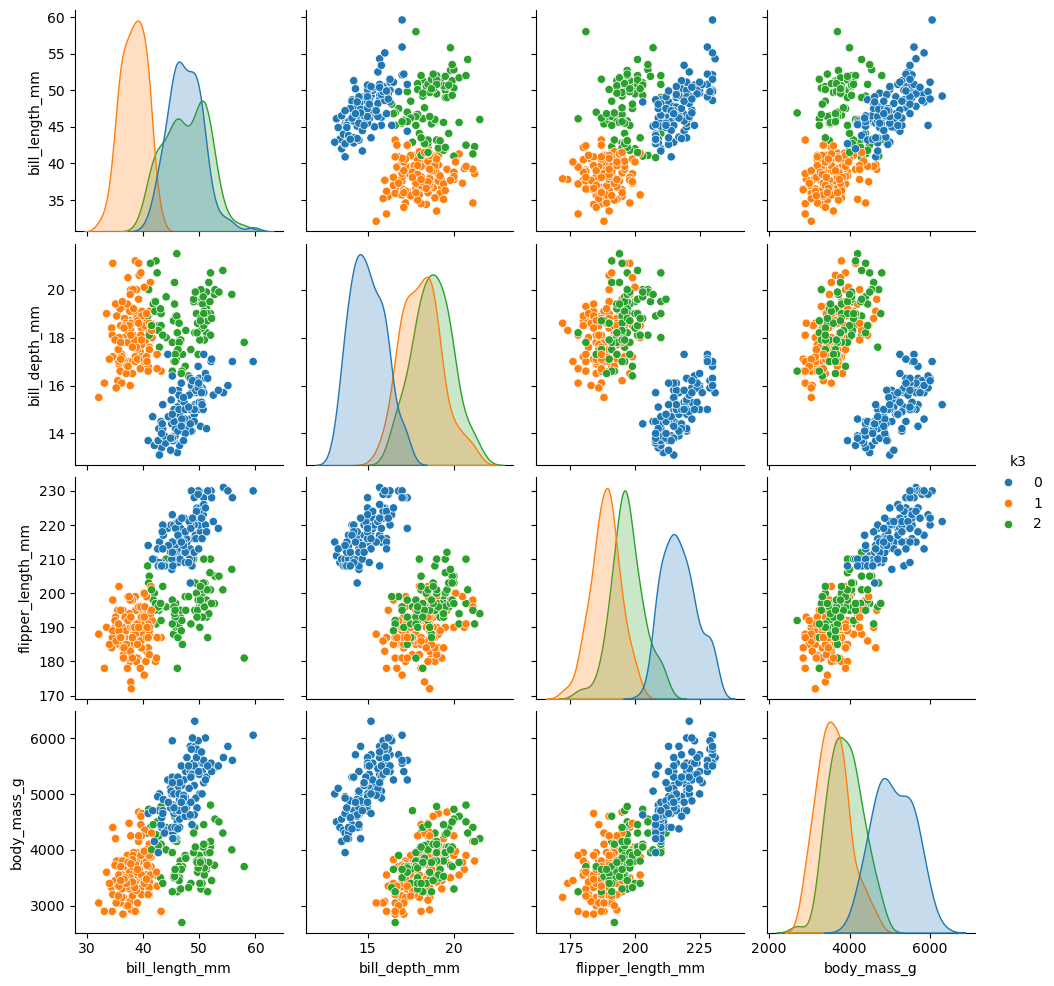

In [33]:
sns.pairplot(data=penguins_clean_copy, 
             hue="k3", 
             diag_kws={"common_norm":False})

plt.show()

Use a heatmap to visually show how well the CLUSTERS align with the KNOWN Groupings!

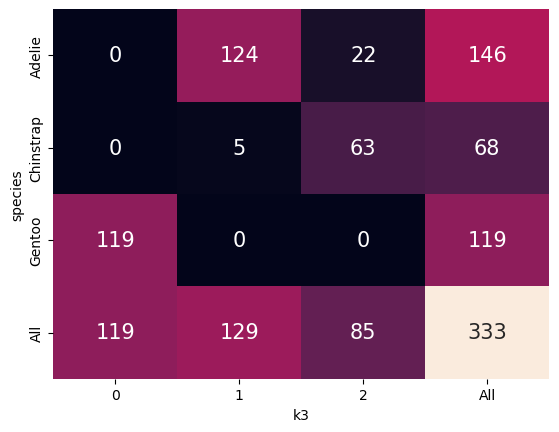

In [34]:
fig, ax = plt.subplots()

sns.heatmap(data=pd.crosstab(penguins_clean_copy.species, penguins_clean_copy.k3, margins=True),
            annot=True,
            annot_kws={"fontsize":15},
            fmt="g",
            cbar=False,
            ax=ax)

plt.show()

Look at scatterplot between 2 of the variables. Coloy by k3 and set marker shape by species.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


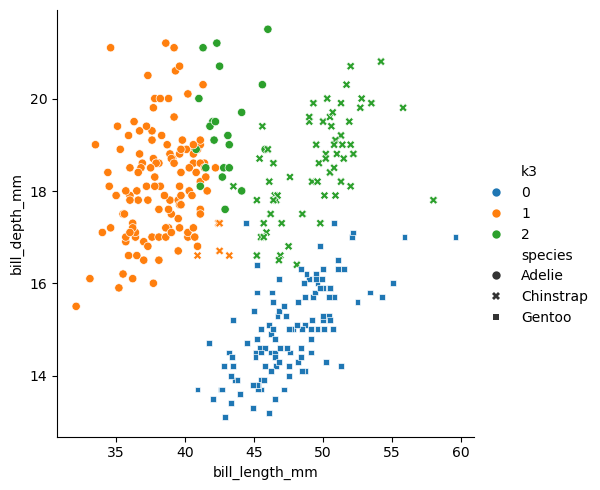

In [39]:
sns.relplot(data=penguins_clean_copy, 
            x="bill_length_mm", 
            y="bill_depth_mm", 
            hue="k3",
            style="species")

plt.show()

## OPTIMAL NUMBER OF CLUSTERS

We need the KNEE BEND PLOT!!

In [42]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit(X)

    tots_within.append(km.inertia_)

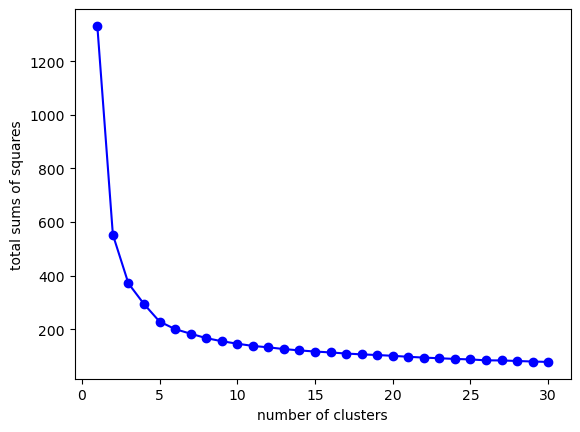

In [43]:
fig, ax = plt.subplots()

ax.plot(K, tots_within, "bo-")
ax.set_xlabel("number of clusters")
ax.set_ylabel("total sums of squares")

plt.show()

He says that no more than 10 as the descrease is flat after that.

He says between 3 and 6 has the best knee bends.

What if we would use 5 clusters based on the KNEE BEND?

In [50]:
clusters_5 = KMeans(n_clusters=5, random_state=121, n_init=25, max_iter=500).fit_predict(X)

In [51]:
clusters_5

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2,
       2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,

In [52]:
penguins_clean_copy["k5"] = pd.Series(clusters_5, index=penguins_clean_copy.index).astype("category")

In [53]:
penguins_clean_copy

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,k2,k3,k5
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1,0,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1,0,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1,0,3
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1,0,2


In [56]:
penguins_clean_copy.k5.value_counts()

k5
0    89
4    65
2    62
1    60
3    57
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


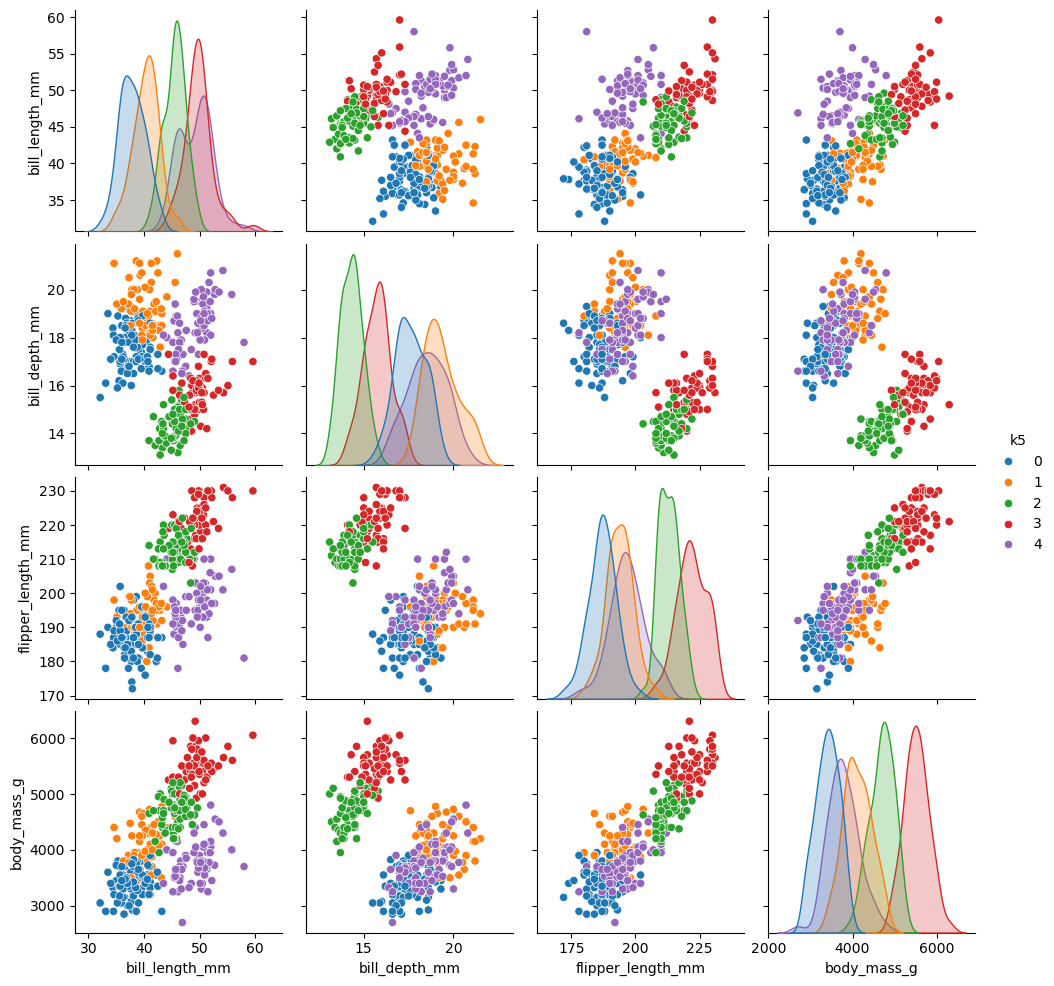

In [57]:
sns.pairplot(penguins_clean_copy, 
             hue="k5",
             diag_kws={"common_norm":False})

plt.show()

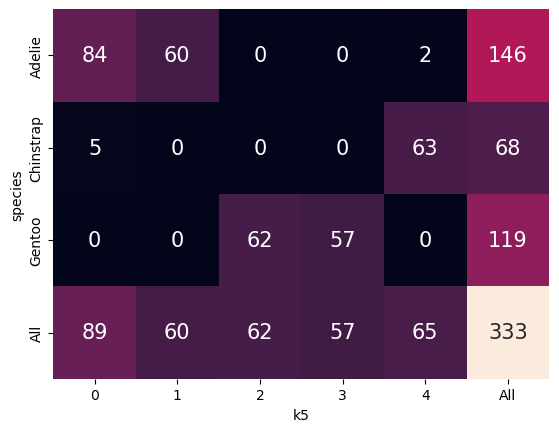

In [55]:
sns.heatmap(data=pd.crosstab(penguins_clean_copy.species, penguins_clean_copy.k5, margins=True),
            annot=True,
            annot_kws={"fontsize":15},
            fmt="g",
            cbar=False,
            ax=ax)

plt.show()